In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import utils

In [21]:
import chess
import chess.engine

board = chess.Board()

engine = chess.engine.SimpleEngine.popen_uci(
    "C:/Users/USER/Downloads/stockfish-windows-x86-64-avx2/stockfish/stockfish-windows-x86-64-avx2.exe"
)

board

NotImplementedError: 

In [29]:
prev_state = [line.split() for line in str(board).splitlines()]

for i in range(8):
    for j in range(8):
        pos = prev_state[i][j]
        if not pos.isalpha():
            prev_state[i][j] = 0
        else:
            prev_state[i][j] = 1 if pos.isupper() else 2

prev_state = np.array(prev_state, dtype=np.int64)
prev_state

array([[2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1]])

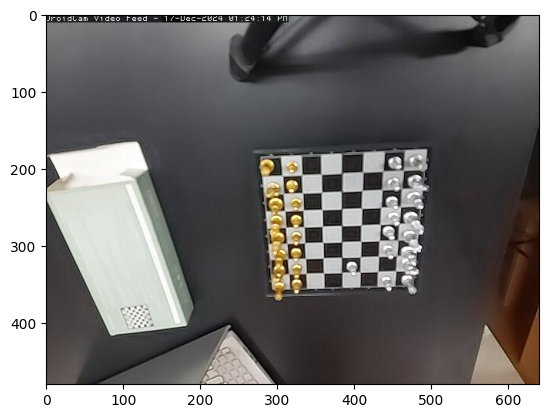

In [40]:
r, src_image = cv2.VideoCapture("http://192.168.0.101:4747/video").read()

src_image = cv2.cvtColor(src_image, cv2.COLOR_BGR2RGB)

plt.imshow(src_image)
plt.show()

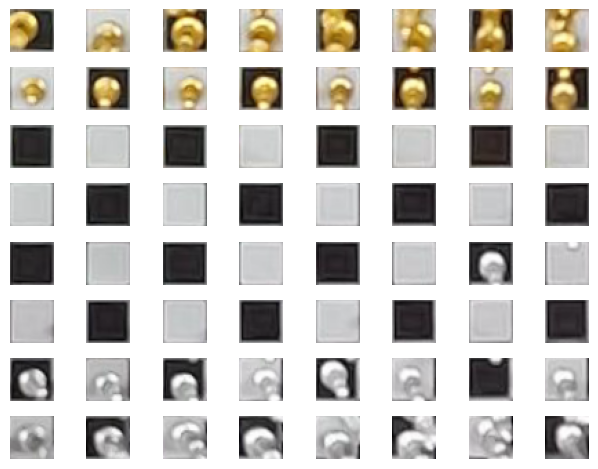

In [46]:
patches = utils.get_board_patches(src_image)
patches = patches.transpose(1, 0, 2, 3, 4)

for i in range(8):
    for j in range(8):
        plt.subplot(8, 8, 8 * i + j + 1)
        plt.imshow(patches[i, j])
        plt.axis("off")

plt.tight_layout()
plt.show()

In [47]:
state = utils.pred_patches(patches)
state

array([[2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2],
       [0, 1, 0, 1, 0, 1, 0, 2],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 1, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [1, 2, 1, 2, 1, 2, 0, 2],
       [2, 2, 2, 2, 2, 2, 2, 2]])

In [39]:
diff = np.where(state == 1, 1, 0) - np.where(prev_state == 1, 1, 0)
diff

array([[ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  1,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  1,  0,  1,  0,  1],
       [ 1,  1,  1,  0,  1,  0,  1,  0],
       [ 0,  1,  0,  1,  0,  1,  0,  1],
       [-1, -1, -1,  0, -1,  0, -1,  0],
       [ 0, -1,  0, -1,  0, -1, -1, -1]])

In [116]:
row_map = ["a", "b", "c", "d", "e", "f", "g", "h"]
col_map = ["8", "7", "6", "5", "4", "3", "2", "1"]

[src] = np.argwhere(diff==-1)
[dest] = np.argwhere(diff==1)

src = row_map[src[1]] + col_map[src[0]]
dest = row_map[dest[1]] + col_map[dest[0]]

move = src + dest
move

'd1e1'

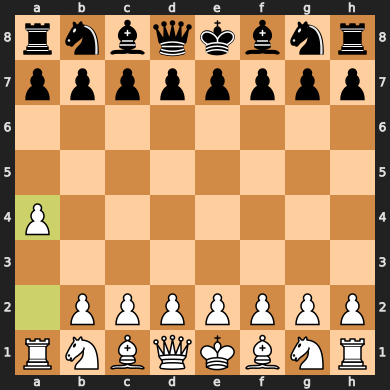

In [10]:
board.push_san(move)
display(board)

e8c8


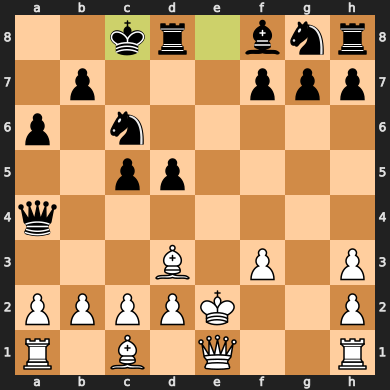

In [118]:
result = engine.play(board, chess.engine.Limit(time=5))
board.push(result.move)
print(result.move)
display(board)

In [1]:
pip install stockfish

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at d:\anaconda\lib\site-packages\ftfy-6.1.3-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at d:\anaconda\lib\site-packages\torchvision-0.16.2-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at d:\anaconda\lib\site-packages\wcwidth-0.2.12-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### To-Do

- Castling